<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Python/210801_Project_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns


Dataset is annual charges and costs by Ambulatory Payment Classification (APC) for U.S. hospitals for 2015-2018.  https://data.cms.gov/provider-summary-by-type-of-service/medicare-outpatient-hospitals/medicare-outpatient-hospitals-by-provider-and-service/data/2018

In [3]:
df_drg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2015-2018 Medicare IP hospital charges by DRG.csv')
df_drg.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,DRG_Cd-Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,AL,36301,3630.0,36301,3,"ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MO...","3-ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, ...",13,368434.00000,81540.923080,80434.923080
1,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,AL,36301,3630.0,36301,23,CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE COM...,23-CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE ...,33,148677.12120,29061.515150,27996.575760
2,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,AL,36301,3630.0,36301,25,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...,25-CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROC...,26,118718.34620,22441.769230,19591.807690
3,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,AL,36301,3630.0,36301,38,EXTRACRANIAL PROCEDURES W CC,38-EXTRACRANIAL PROCEDURES W CC,11,74449.18182,9546.000000,7561.818182
4,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,AL,36301,3630.0,36301,39,EXTRACRANIAL PROCEDURES W/O CC/MCC,39-EXTRACRANIAL PROCEDURES W/O CC/MCC,64,46627.78125,6468.296875,5073.296875


In [21]:
df_drg.drop(['Rndrng_Prvdr_State_FIPS','Rndrng_Prvdr_RUCA', 'Rndrng_Prvdr_RUCA_Desc'], axis = 1, inplace = True)

KeyError: ignored

In [25]:
df_drg.rename(columns = {'Rndrng_Prvdr_State_Abrvtn' : 'State', 'Rndrng_Prvdr_Zip5' : 'Zip Code'}, inplace=True)

In [26]:
df_drg.info()
# The numeric columns Avg_Tot_Pymt_Amt, etc. should be saved in "General" format in .csv file, 
# If you save the numeric columns as "Number", they are changed to "object" in Python.
# a "General" number is changed to "int64" if the column in .csv has no decimals, and 
# a "General" number is changed to "float64" if the column in the .csv does have decimals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788487 entries, 0 to 788486
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        788487 non-null  int64  
 1   Rndrng_Prvdr_CCN            788487 non-null  int64  
 2   Rndrng_Prvdr_Org_Name       788487 non-null  object 
 3   Rndrng_Prvdr_St             788487 non-null  object 
 4   Rndrng_Prvdr_City           788487 non-null  object 
 5   State                       788487 non-null  object 
 6   Zip Code                    788487 non-null  int64  
 7   Rndrng_Prvdr_RUCA           788487 non-null  float64
 8   DRG_Cd                      788487 non-null  int64  
 9   DRG_Desc                    788487 non-null  object 
 10  DRG_Cd-Desc                 788487 non-null  object 
 11  Tot_Dschrgs                 788487 non-null  int64  
 12  Avg_Submtd_Cvrd_Chrg        788487 non-null  float64
 13  Avg_Tot_Pymt_A

In [47]:
# Find out the number of unique DRGs and hospitals
df_drg.nunique()
# Finding: there are 623 unique DRGs and 3,632 unique hospitals

Year                               4
Rndrng_Prvdr_CCN                3307
Rndrng_Prvdr_Org_Name           3632
Rndrng_Prvdr_St                 3440
Rndrng_Prvdr_City               1961
State                             51
Zip Code                        3027
Rndrng_Prvdr_RUCA               2225
DRG_Cd                           623
DRG_Desc                         687
DRG_Cd-Desc                      690
Tot_Dschrgs                     1055
Avg_Submtd_Cvrd_Chrg          769140
Avg_Tot_Pymt_Amt              708921
Avg_Mdcr_Pymt_Amt             703700
Total IP Charges              773368
Total IP Payments             724941
Total IP Medicare Payments    717766
dtype: int64

In [6]:
df_apc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2015-2018 Medicare OP hospital charges by APC.csv')
df_apc.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,APC_Cd,APC_Desc,APC_Cd-Desc,Bene_Cnt,CAPC_Srvcs,Avg_Tot_Sbmtd_Chrgs,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Outlier_Srvcs,Avg_Mdcr_Outlier_Amt,Unnamed: 20
0,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,5072-Level 2 Excision/ Biopsy/ Incision and Dr...,248,262,10384,1141,909,NaN,NaN,NaN
1,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,5073-Level 3 Excision/ Biopsy/ Incision and Dr...,31,35,17146,1937,1535,NaN,NaN,NaN
2,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5091,Level 1 Breast/Lymphatic Surgery and Related P...,5091-Level 1 Breast/Lymphatic Surgery and Rela...,23,23,11134,2322,1850,0.0,0.0,NaN
3,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5092,Level 2 Breast/Lymphatic Surgery and Related P...,5092-Level 2 Breast/Lymphatic Surgery and Rela...,44,44,16885,4096,3263,0.0,0.0,NaN
4,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5112,Level 2 Musculoskeletal Procedures,5112-Level 2 Musculoskeletal Procedures,20,20,11335,1103,870,0.0,0.0,NaN


In [7]:
df_apc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309174 entries, 0 to 309173
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Year                       309174 non-null  int64  
 1   Rndrng_Prvdr_CCN           309174 non-null  int64  
 2   Rndrng_Prvdr_Org_Name      309174 non-null  object 
 3   Rndrng_Prvdr_St            309174 non-null  object 
 4   Rndrng_Prvdr_City          309174 non-null  object 
 5   Rndrng_Prvdr_State_Abrvtn  309174 non-null  object 
 6   Rndrng_Prvdr_State_FIPS    309174 non-null  int64  
 7   Rndrng_Prvdr_Zip5          309174 non-null  int64  
 8   Rndrng_Prvdr_RUCA          309113 non-null  float64
 9   Rndrng_Prvdr_RUCA_Desc     309113 non-null  object 
 10  APC_Cd                     309174 non-null  int64  
 11  APC_Desc                   309174 non-null  object 
 12  APC_Cd-Desc                309174 non-null  object 
 13  Bene_Cnt                   30

In [27]:
df_apc.drop(['Rndrng_Prvdr_RUCA', 'Outlier_Srvcs', 'Avg_Mdcr_Outlier_Amt', 'Unnamed: 20'], axis = 1, inplace = True)

KeyError: ignored

In [29]:
df_apc.rename(columns = {'Rndrng_Prvdr_State_Abrvtn' : 'State', 'Rndrng_Prvdr_Zip5' : 'Zip Code'}, inplace=True)

In [30]:
df_apc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309174 entries, 0 to 309173
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     309174 non-null  int64  
 1   Rndrng_Prvdr_CCN         309174 non-null  int64  
 2   Rndrng_Prvdr_Org_Name    309174 non-null  object 
 3   Rndrng_Prvdr_St          309174 non-null  object 
 4   Rndrng_Prvdr_City        309174 non-null  object 
 5   State                    309174 non-null  object 
 6   Rndrng_Prvdr_State_FIPS  309174 non-null  int64  
 7   Zip Code                 309174 non-null  int64  
 8   Rndrng_Prvdr_RUCA        309113 non-null  float64
 9   Rndrng_Prvdr_RUCA_Desc   309113 non-null  object 
 10  APC_Cd                   309174 non-null  int64  
 11  APC_Desc                 309174 non-null  object 
 12  APC_Cd-Desc              309174 non-null  object 
 13  Bene_Cnt                 306449 non-null  object 
 14  CAPC

In [48]:
# Find out the number of unique APCs and hospitals
df_apc.nunique()
# Finding: there are 90 unique DRGs and 3,710 unique hospitals

Year                               4
Rndrng_Prvdr_CCN                3396
Rndrng_Prvdr_Org_Name           3710
Rndrng_Prvdr_St                 3539
Rndrng_Prvdr_City               1954
State                             50
Rndrng_Prvdr_State_FIPS           50
Zip Code                        3043
Rndrng_Prvdr_RUCA                 18
Rndrng_Prvdr_RUCA_Desc            14
APC_Cd                            90
APC_Desc                          89
APC_Cd-Desc                       93
Bene_Cnt                        1902
CAPC_Srvcs                      1811
Avg_Tot_Sbmtd_Chrgs            67157
Avg_Mdcr_Alowd_Amt             20530
Avg_Mdcr_Pymt_Amt              20074
Unnamed: 20                        0
Total OP Charges              152816
Total OP Medicare Payments    110019
dtype: int64

In [18]:
# For DRG inpatient services, 
# Multiply Average Covered Charges by Total Discharges to obtain new column, Total IP Charges
df_drg['Total IP Charges'] = df_drg['Avg_Submtd_Cvrd_Chrg'] * df_drg['Tot_Dschrgs']

# Multiply Average Total Payments by Total Discharges to obtain new column, Total IP Payments
df_drg['Total IP Payments'] = df_drg['Avg_Tot_Pymt_Amt'] * df_drg['Tot_Dschrgs']

# Multiply Average Total Medicare Payments by Total Discharges to obtain new column, Total IP Medicare Payments
df_drg['Total IP Medicare Payments'] = df_drg['Avg_Mdcr_Pymt_Amt'] * df_drg['Tot_Dschrgs']


In [31]:
df_drg.head().round(0)

,Year,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,State,Zip Code,Rndrng_Prvdr_RUCA,DRG_Cd,DRG_Desc,DRG_Cd-Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt,Total IP Charges,Total IP Payments,Total IP Medicare Payments
0,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,3630.0,3,"ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MO...","3-ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, ...",13,368434.0,81541.0,80435.0,4789642.0,1060032.0,1045654.0
1,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,3630.0,23,CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE COM...,23-CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE ...,33,148677.0,29062.0,27997.0,4906345.0,959030.0,923887.0
2,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,3630.0,25,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...,25-CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROC...,26,118718.0,22442.0,19592.0,3086677.0,583486.0,509387.0
3,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,3630.0,38,EXTRACRANIAL PROCEDURES W CC,38-EXTRACRANIAL PROCEDURES W CC,11,74449.0,9546.0,7562.0,818941.0,105006.0,83180.0
4,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,36301,3630.0,39,EXTRACRANIAL PROCEDURES W/O CC/MCC,39-EXTRACRANIAL PROCEDURES W/O CC/MCC,64,46628.0,6468.0,5073.0,2984178.0,413971.0,324691.0


In [32]:
# For APC outpatient services, multiply Average Total Submitted Charges by Number of APC Services to obtain new column, Total Charges
df_apc['Total OP Charges'] = df_apc['Avg_Tot_Sbmtd_Chrgs'] * df_apc['CAPC_Srvcs']

# Multiply Average Medicare Payment Amount by Number of APC Services to obtain new column, Total Medicare Payments
df_apc['Total OP Medicare Payments'] = df_apc['Avg_Mdcr_Pymt_Amt'] * df_apc['CAPC_Srvcs']


In [33]:
df_apc.head()

,Year,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,State,Rndrng_Prvdr_State_FIPS,Zip Code,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,APC_Cd,APC_Desc,APC_Cd-Desc,Bene_Cnt,CAPC_Srvcs,Avg_Tot_Sbmtd_Chrgs,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Unnamed: 20,Total OP Charges,Total OP Medicare Payments
0,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,5072-Level 2 Excision/ Biopsy/ Incision and Dr...,248,262,10384,1141,909,NaN,2720608,238158
1,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,5073-Level 3 Excision/ Biopsy/ Incision and Dr...,31,35,17146,1937,1535,NaN,600110,53725
2,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5091,Level 1 Breast/Lymphatic Surgery and Related P...,5091-Level 1 Breast/Lymphatic Surgery and Rela...,23,23,11134,2322,1850,NaN,256082,42550
3,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5092,Level 2 Breast/Lymphatic Surgery and Related P...,5092-Level 2 Breast/Lymphatic Surgery and Rela...,44,44,16885,4096,3263,NaN,742940,143572
4,2018,10001,Southeast Alabama Medical Center,1108 Ross Clark Circle,Dothan,AL,1,36301,1.0,Metropolitan area core: primary flow within an...,5112,Level 2 Musculoskeletal Procedures,5112-Level 2 Musculoskeletal Procedures,20,20,11335,1103,870,NaN,226700,17400


In [49]:
# Describe the DRG inpatient data 
df_drg.describe().round(0)
# Finding: the average annual charge amount for a DRG at a hospital is $2.1M and the average annual Medicare 
# payment is $411K, i.e. 20% of the charged amount

,Year,Rndrng_Prvdr_CCN,Zip Code,Rndrng_Prvdr_RUCA,DRG_Cd,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt,Total IP Charges,Total IP Payments,Total IP Medicare Payments
count,788487.0,788487.0,788487.0,788487.0,788487.0,788487.0,788487.0,788487.0,788487.0,788487.0,788487.0,788487.0
mean,2016.0,256082.0,47232.0,1164.0,413.0,37.0,59718.0,13857.0,11724.0,2079438.0,489298.0,411336.0
std,1.0,151404.0,27948.0,2468.0,248.0,55.0,71750.0,14611.0,12989.0,4149724.0,917523.0,773434.0
min,2015.0,10001.0,1040.0,1.0,1.0,11.0,1521.0,2366.0,0.0,22812.0,31991.0,0.0
25%,2015.0,110078.0,25301.0,1.0,208.0,14.0,23471.0,6497.0,5141.0,504649.0,135522.0,109111.0
50%,2016.0,240115.0,44024.0,1.0,357.0,22.0,39120.0,9591.0,7995.0,995420.0,245728.0,202693.0
75%,2017.0,380037.0,72205.0,10.0,603.0,39.0,69127.0,15379.0,13003.0,2115386.0,497716.0,418561.0
max,2018.0,670122.0,99801.0,9980.0,989.0,4255.0,3427380.0,552972.0,495666.0,300283908.0,90575736.0,61474341.0


In [50]:
# Describe the APG outpatient data
df_apc.describe().round(0)
# Finding: The average annual APG charge at a hospital is $1.2M and the average Medicare payment is $168K, i.e. 14%

,Year,Rndrng_Prvdr_CCN,Rndrng_Prvdr_State_FIPS,Zip Code,Rndrng_Prvdr_RUCA,APC_Cd,CAPC_Srvcs,Avg_Tot_Sbmtd_Chrgs,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Unnamed: 20,Total OP Charges,Total OP Medicare Payments
count,309174.0,309174.0,309174.0,309174.0,309113.0,309174.0,309174.0,309174.0,309174.0,309174.0,0.0,309174.0,309174.0
mean,2017.0,262638.0,28.0,51446.0,2.0,4808.0,49.0,17838.0,3197.0,2761.0,NaN,1203556.0,168272.0
std,1.0,159750.0,16.0,27894.0,7.0,1664.0,159.0,30213.0,5491.0,5110.0,NaN,3283596.0,411281.0
min,2015.0,10001.0,1.0,1040.0,1.0,39.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
25%,2016.0,110089.0,13.0,30041.0,1.0,5114.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
50%,2017.0,260025.0,29.0,48341.0,1.0,5222.0,12.0,6616.0,1298.0,1030.0,NaN,170791.0,25168.0
75%,2018.0,390114.0,42.0,76048.0,1.0,5375.0,41.0,23219.0,3922.0,3097.0,NaN,1070305.0,156611.0
max,2018.0,673058.0,56.0,99801.0,99.0,8011.0,30139.0,569051.0,45991.0,44647.0,NaN,160479137.0,12515399.0


In [60]:
# Identify the unique DRG inpatient codes
df_drg['DRG_Cd'].unique()

array([  3,  23,  25,  38,  39,  57,  64,  65,  66,  69,  70,  71,  73,
        74,  85,  87,  91,  92, 100, 101, 163, 166, 175, 176, 177, 180,
       189, 190, 191, 192, 193, 194, 202, 205, 207, 208, 233, 234, 236,
       242, 243, 244, 246, 247, 252, 253, 254, 264, 267, 269, 270, 271,
       280, 281, 282, 283, 286, 287, 291, 292, 293, 304, 305, 308, 309,
       310, 312, 313, 314, 329, 330, 331, 371, 377, 378, 388, 389, 390,
       391, 392, 393, 394, 417, 418, 419, 432, 433, 439, 441, 454, 455,
       460, 469, 470, 480, 481, 482, 483, 493, 494, 517, 552, 603, 637,
       638, 640, 641, 669, 673, 682, 683, 684, 689, 690, 698, 699, 708,
       811, 812, 813, 853, 854, 862, 870, 871, 872, 880, 884, 885, 897,
       917, 956, 981, 982, 178, 195, 300, 379, 440, 442, 445, 536, 918,
       948,  68,  86, 164, 196, 299, 303, 438, 542, 543, 881, 235, 266,
       372, 621, 167, 694, 117, 563,   4, 103, 239, 315, 472, 473, 607,
       220, 617, 240, 251, 467, 895,   5,   6,  11,  12,  13,  1

In [62]:
# Identify the unique APC inpatient codes
df_apc['APC_Cd'].unique()

array([5072, 5073, 5091, 5092, 5112, 5113, 5114, 5115, 5153, 5154, 5155,
       5164, 5165, 5191, 5192, 5193, 5194, 5212, 5213, 5222, 5223, 5224,
       5231, 5232, 5302, 5303, 5313, 5331, 5341, 5361, 5362, 5373, 5374,
       5375, 5376, 5377, 5414, 5415, 5416, 5431, 5432, 5462, 5463, 5464,
       5471, 5491, 5492, 5503, 5627, 8011, 5094, 5200, 5504, 5493, 5494,
       5093, 5116, 5166, 5211, 5881, 5495, 5244, 5123, 5124, 5125,   39,
         61,   67,   83,   89,   90,  107,  108,  202,  227,  229,  318,
        319,  384,  385,  386,  425,  655,  648,   84,   85,   86,  293,
        259,  351])

In [100]:
# Rank inpatient DRGs by Total Charges
# df_drg = "{:,}".format()
# Numberz = "{:,}".format(df_drg['Total IP Charges'])
# Numberz = "{:,}".format(4000000)

df_drg.groupby(['DRG_Cd-Desc'])['Total IP Charges'].sum().sort_values(ascending=False)

#'{:,}'.format()  can't add commas to output; must view in scientific notation
# Finding: DRG 871 Septicemia had the highest amount of charges ($100B) of all DRGs over 2015-2018

DRG_Cd-Desc
871-SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                    1.043743e+11
470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    8.711280e+10
853-INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC                5.222114e+10
291-HEART FAILURE & SHOCK W MCC                                           5.184358e+10
460-SPINAL FUSION EXCEPT CERVICAL W/O MCC                                 3.276179e+10
                                                                              ...     
922-"OTHER INJURY, POISONING & TOXIC EFFECT DIAG W MCC"                   2.936840e+05
869-OTHER INFECTIOUS & PARASITIC DISEASES DIAGNOSES W/O CC/MCC            2.429400e+05
572-SKIN DEBRIDEMENT W/O CC/MCC                                           1.675390e+05
376-DIGESTIVE MALIGNANCY W/O CC/MCC                                       1.622430e+05
53-SPINAL DISORDERS & INJURIES W/O CC/MCC                                 8.000700e+04
Name: Total IP Charges, Length:

In [65]:
# Can't apply format() to query results
numbers = "{:,}".format(50000000)
print(numbers)

50,000,000


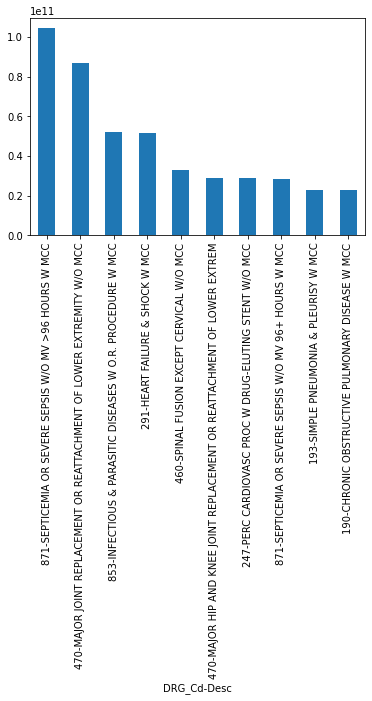

In [81]:
# Bar graph of top 10 inpatient DRGs ranked by Total Charges
df_drg.groupby(['DRG_Cd-Desc'])['Total IP Charges'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
# Finding: DRG 871 Septicemia had the highest amount of charges ($100B) of all DRGs over 2015-2018

In [83]:
# Rank inpatient DRGs by Total Charges by Year
df_drg.groupby(['Year', 'DRG_Cd-Desc'])['Total IP Charges'].sum().sort_values(ascending=False)
# Finding: DRG 871 Septicemia in 2018 had the highest amount of charges ($38B) of all DRGs

Year  DRG_Cd-Desc                                                           
2018  871-SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                    3.854033e+10
2017  871-SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                    3.553643e+10
      470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    3.082505e+10
2016  871-SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                    3.029756e+10
      470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    2.967276e+10
                                                                                    ...     
2015  766-CESAREAN SECTION W/O CC/MCC                                           1.107710e+05
      534-FRACTURES OF FEMUR W/O MCC                                            8.858800e+04
2018  886-BEHAVIORAL & DEVELOPMENTAL DISORDERS                                  8.499900e+04
2017  53-SPINAL DISORDERS & INJURIES W/O CC/MCC                                 8.0007

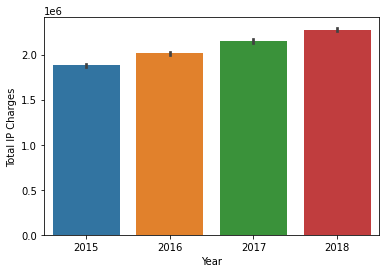

In [106]:
# Total IP charges by year for all DRGs
sns.barplot(x='Year', y = 'Total IP Charges', data = df_drg)

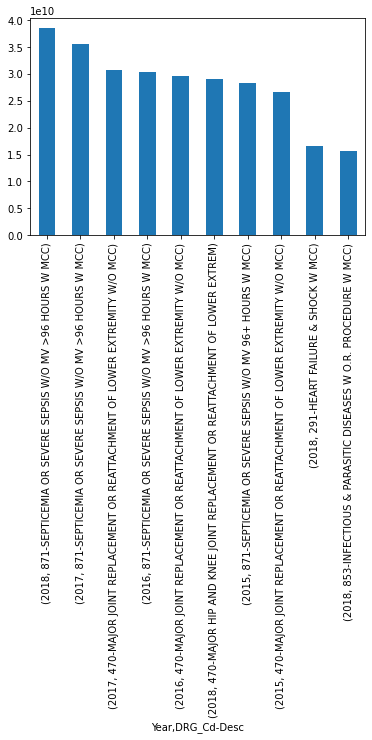

In [89]:
# Rank inpatient DRGs by Total Charges by year
df_drg.groupby(['Year', 'DRG_Cd-Desc'])['Total IP Charges'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
# Finding: DRG 871 Septicemia in 2018 had the highest amount of charges ($38B) of all DRGs

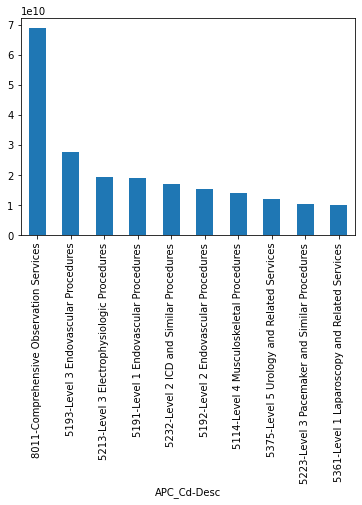

In [114]:
# Rank outpatient APCs by Total Charges over 3 years
df_apc.groupby(['APC_Cd-Desc'])['Total OP Charges'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
# Finding:

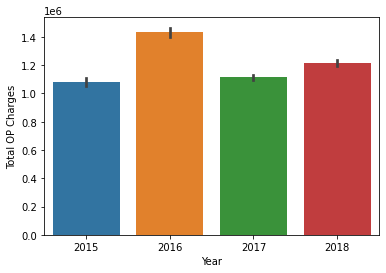

In [110]:
# Total OP charges by year for all APCs
sns.barplot(x='Year', y = 'Total OP Charges', data = df_apc)

In [111]:
# Rank outpatient APCs by Total Charges over 3 years
df_apc.groupby(['APC_Cd-Desc'])['Total OP Charges'].sum().sort_values(ascending=False)
# Finding:

APC_Cd-Desc
8011-Comprehensive Observation Services                     68889305751
5193-Level 3 Endovascular Procedures                        27775736528
5213-Level 3 Electrophysiologic Procedures                  19360087813
5191-Level 1 Endovascular Procedures                        19047542828
5232-Level 2 ICD and Similar Procedures                     16822428545
                                                               ...     
351-Level V Intraocular Procedures                                58704
5881-Ancillary Outpatient Services When Patient Dies                  0
5495-Level 5 Intraocular Procedures                                   0
5494-Level 4 Intraocular Procedures                                   0
5244-Level 4 Blood Product Exchange and Related Services              0
Name: Total OP Charges, Length: 93, dtype: int64

In [113]:
# Rank outpatient APCs by Total Charges and Year
df_apc.groupby(['Year', 'APC_Cd-Desc'])['Total OP Charges'].sum().sort_values(ascending=False).head(5)
# Finding: DRG 871 Septicemia in 2018 had the highest amount of charges ($38B) of all DRGs


Year  APC_Cd-Desc                            
2018  8011-Comprehensive Observation Services    23900160143
2017  8011-Comprehensive Observation Services    22938028934
2016  8011-Comprehensive Observation Services    22051116674
2018  5193-Level 3 Endovascular Procedures       12585777318
2017  5193-Level 3 Endovascular Procedures       11363071943
Name: Total OP Charges, dtype: int64

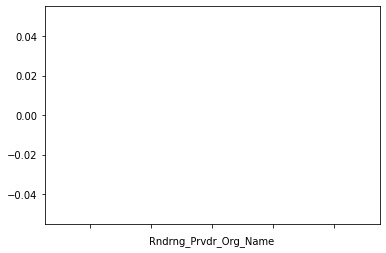

In [125]:
# Top 3 DRGs by Total Charges are plotted for the top 3 hospitals by Total Charges
drg_871_data = df_drg[df_drg['DRG_Cd'] == '871']
drg_470_data = df_drg[df_drg['DRG_Cd'] == '470']
drg_853_data = df_drg[df_drg['DRG_Cd'] == '853']
drg_871_data.groupby(['Rndrng_Prvdr_Org_Name'])['Total IP Charges'].sum().sort_values(ascending=False).head(3).plot()
drg_470_data.groupby(['Rndrng_Prvdr_Org_Name'])['Total IP Charges'].sum().sort_values(ascending=False).head(3).plot()
drg_853_data.groupby(['Rndrng_Prvdr_Org_Name'])['Total IP Charges'].sum().sort_values(ascending=False).head(3).plot()


In [129]:
# Rank DRGs by Total Charges at different hospitals 
df_drg.groupby(['DRG_Cd-Desc', 'Rndrng_Prvdr_Org_Name'])['Total IP Charges'].sum().sort_values(ascending=False).head(20)
# Finding: Hospital for Special Surgery had the higest amount of charges ($820M) for DRG 470


DRG_Cd-Desc                                                             Rndrng_Prvdr_Org_Name           
470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC  Hospital For Special Surgery        8.214967e+08
871-SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                  Cedars-Sinai Medical Center         7.429215e+08
3-ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.   Upmc Presbyterian Shadyside         5.387001e+08
853-INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC              Cedars-Sinai Medical Center         5.242456e+08
266-ENDOVASCULAR CARDIAC VALVE REPLACEMENT W MCC                        Cedars-Sinai Medical Center         5.012122e+08
1-HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC              Cedars-Sinai Medical Center         4.959283e+08
470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC  Cedars-Sinai Medical Center         4.390698e+08
219-CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC 

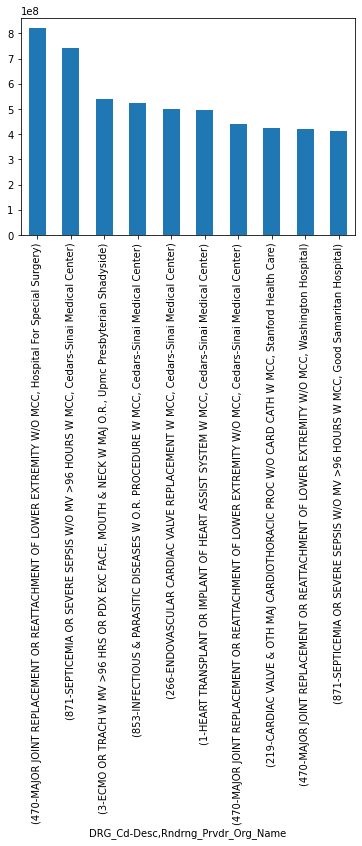

In [132]:
# Bar graph for DRGs ranked by Total Charges at different hospitals 
df_drg.groupby(['DRG_Cd-Desc', 'Rndrng_Prvdr_Org_Name'])['Total IP Charges'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
# Finding: Hospital for Special Surgery had the higest amount of charges ($820M) for DRG 470

In [134]:
# Rank DRGs by Total Charges at different hospitals - Hosptial first, DRG second
df_drg.groupby(['Rndrng_Prvdr_Org_Name', 'DRG_Cd-Desc'])['Total IP Charges'].sum().sort_values(ascending=False).head(20)
# Finding: Hospital for Special Surgery had the higest amount of charges ($820M) for DRG 470

Rndrng_Prvdr_Org_Name             DRG_Cd-Desc                                                           
Hospital For Special Surgery      470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    8.214967e+08
Cedars-Sinai Medical Center       871-SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                    7.429215e+08
Upmc Presbyterian Shadyside       3-ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.     5.387001e+08
Cedars-Sinai Medical Center       853-INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC                5.242456e+08
                                  266-ENDOVASCULAR CARDIAC VALVE REPLACEMENT W MCC                          5.012122e+08
                                  1-HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC                4.959283e+08
                                  470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    4.390698e+08
Stanford Health Care              219-CARDIAC VA

In [135]:
# Rank DRGs by Total Charges at different hospitals - DRG first, State 2nd, Hosptial 3rd
df_drg.groupby(['DRG_Cd-Desc', 'State', 'Rndrng_Prvdr_Org_Name'])['Total IP Charges'].sum().sort_values(ascending=False).head(30)
# Finding; Hospital for Special Surgery in NY had the higest amount of charges ($820M) for DRG 470

DRG_Cd-Desc                                                               State  Rndrng_Prvdr_Org_Name                 
470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    NY     Hospital For Special Surgery              8.214967e+08
871-SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                    CA     Cedars-Sinai Medical Center               7.429215e+08
3-ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.     PA     Upmc Presbyterian Shadyside               5.387001e+08
853-INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC                CA     Cedars-Sinai Medical Center               5.242456e+08
266-ENDOVASCULAR CARDIAC VALVE REPLACEMENT W MCC                          CA     Cedars-Sinai Medical Center               5.012122e+08
1-HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC                CA     Cedars-Sinai Medical Center               4.959283e+08
470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W

In [141]:
# Rank hospitals by Total Charges for the top DRG - 470 - Major Joint Replacement
df_drg2 = df_drg[df_drg['DRG_Cd'] == 470]
df_drg2.groupby(['DRG_Cd-Desc', 'Rndrng_Prvdr_Org_Name'])['Total IP Charges'].sum().sort_values(ascending=False).head(30)
# Finding: Hospital for Special Surgery had the higest amount of charges ($820M) for DRG 470

DRG_Cd-Desc                                                               Rndrng_Prvdr_Org_Name                            
470-MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    Hospital For Special Surgery                         8.214967e+08
                                                                          Cedars-Sinai Medical Center                          4.390698e+08
                                                                          Washington Hospital                                  4.193748e+08
                                                                          Swedish Medical Center                               3.292454e+08
                                                                          Baptist Medical Center                               3.169834e+08
                                                                          Florida Hospital                                     3.143062e+08
                                    

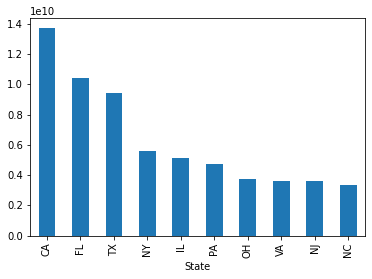

In [146]:
# Bar chart for Top 10 States ranked by Total Charges at for the top DRG - 470 - Major Joint Replacement
df_drg = df_drg[df_drg['DRG_Cd'] == 470]
df_drg.groupby(['State'])['Total IP Charges'].sum().sort_values(ascending=False).head(10).plot(kind = "bar")
# Finding: California had the highest amount of charges ($13B) for DRG 470

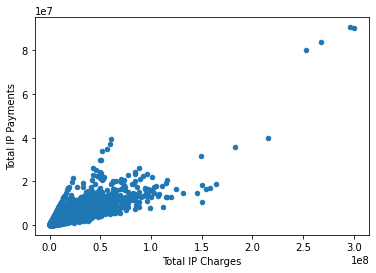

In [147]:
# Scatter plot of Total IP Charges vs Total IP Payments
df_drg.plot(kind="scatter", x = "Total IP Charges", y = "Total IP Payments")
# Finding: Total Charges and Total Payments are correlated

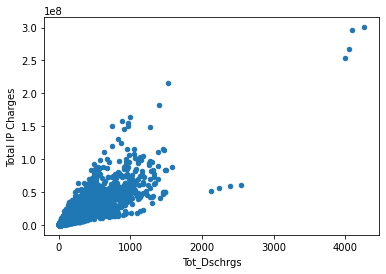

In [148]:
# Scatter plot of Total IP Discharges vs Total IP Charges
df_drg.plot(kind="scatter", x = "Tot_Dschrgs", y = "Total IP Charges")
# Finding: Total Discharges and Total Charges are correlated

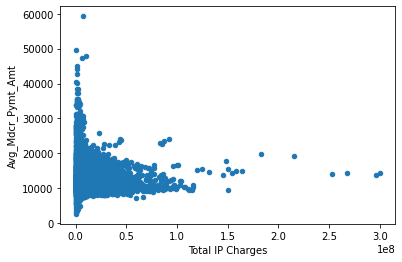

In [149]:
# Scatter plot of Total Charges vs Average Medicare Payments
df_drg.plot(kind="scatter", x = "Total IP Charges", y = "Avg_Mdcr_Pymt_Amt")
# Finding: Average Medicaare Payments leveled off as Total Charges rose